# Using ipyWidgets

In this notebook, we will use ipyWidgets to make dynamic selections of the data being visualized.

In [1]:
import matplotlib.pyplot as plt
from plotnine import ggplot, aes
import plotnine as p9
import numpy as np
import itertools
from ipywidgets import widgets
from IPython.display import display

from plotnine.data import mtcars

First of all, [install ipywidgets](https://ipywidgets.readthedocs.io/en/stable/user_install.html):

```bash
pip install ipywidgets

# for jupyter notebooks:
jupyter nbextension enable --py widgetsnbextension

# for jupyter lab (requires npm):
npm i @jupyter-widgets/jupyterlab-manager
```

Let's have alook on the plot with all the data. We are comparing cars with their horse-power in the X axis and miles-per-gallon in the Y axis. The points are collored by car weight.

<IPython.core.display.Javascript object>

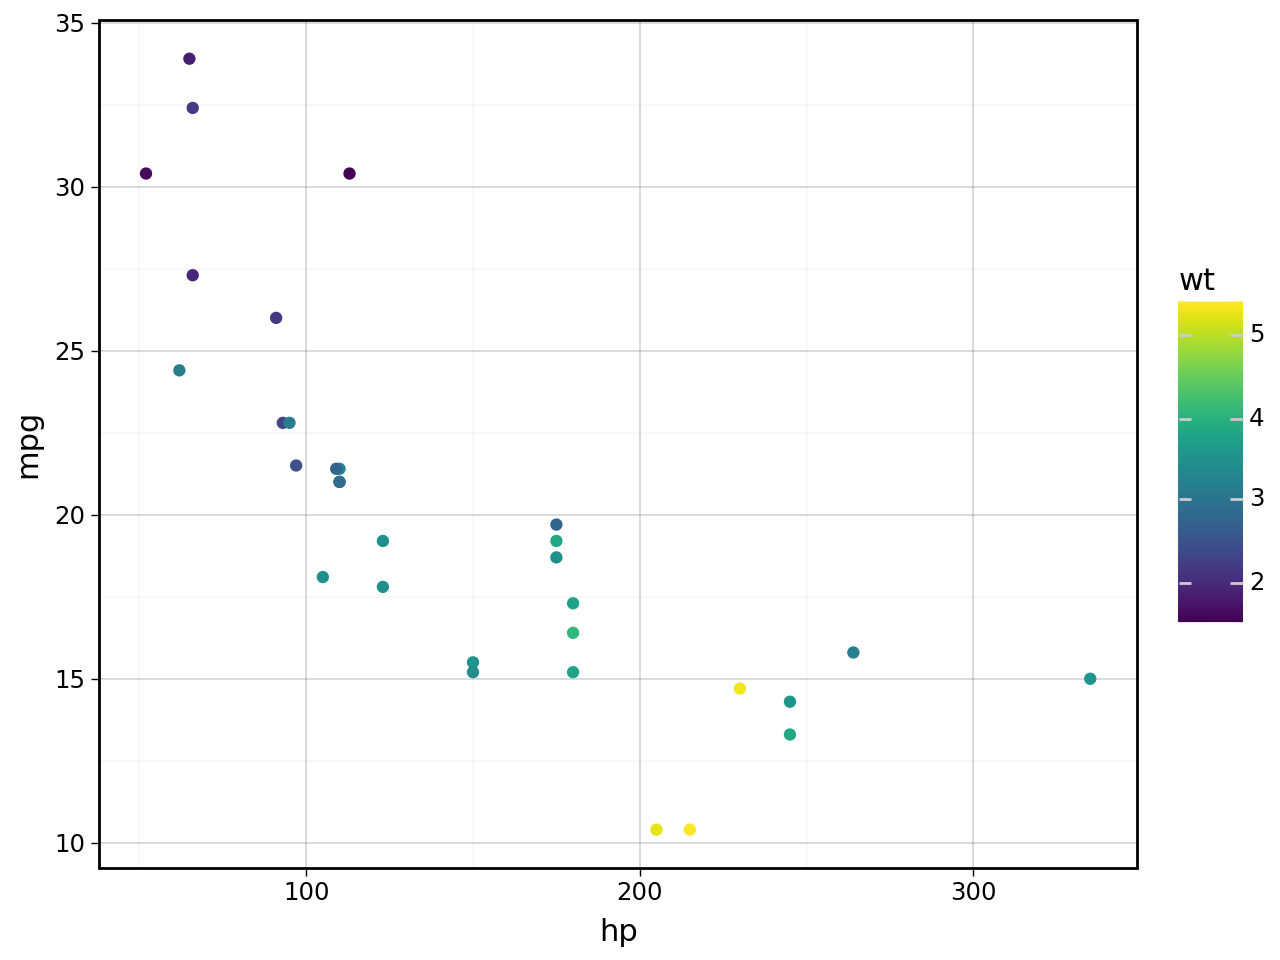

In [2]:
# This has to be used the first time you make a plot. This magic allows the notebook to update plots.
%matplotlib notebook

p = (
    ggplot(mtcars, aes(x="hp", y="mpg", color="wt"))
    + p9.geom_point()
    + p9.theme_linedraw()
)
p

Now we will get relevant values for the creation of plots with sub-sets of data.

Initially, select cars based on number of cylinders

In [3]:
# Prepre the list we will use to selec sub-sets of data based on number of cylinders.
cylList = np.unique(mtcars["cyl"])

In [4]:
# The first selection is a drop-down menu for number of cylinders
cylSelect = widgets.Dropdown(
    options=list(cylList),
    value=cylList[1],
    description="Cylinders:",
    disabled=False,
)

# For the widgets to update the same plot, instead of creating one new image every time
# a selection changes. We keep track of the matplotlib image and axis, so we create only one
# figure and set of axis, for the first plot, and then just re-use the figure and axis
# with plotnine's "_draw_using_figure" function.
fig = None
axs = None


def get_current_artists():
    # Return artists attached to all the matplotlib axes
    axes = plt.gca()
    return itertools.chain(
        axes.lines, axes.collections, axes.artists, axes.patches, axes.texts
    )


# This is the main function that is called to update the plot every time we chage a selection.
def plotUpdate(*args):
    # Use global variables for matplotlib's figure and axis.
    global fig, axs

    # Get current values of the selection widget
    cylValue = cylSelect.value

    # Create a temporary dataset that is constrained by the user's selections.
    tmpDat = mtcars.loc[(mtcars["cyl"] == cylValue), :]

    # Create plotnine's plot

    # Using the maximum and minimum values we gatehred before, we can keep the plot axis from
    # changing with the cyinder selection
    p = (
        ggplot(tmpDat, aes(x="hp", y="mpg", color="wt"))
        + p9.geom_point()
        + p9.theme_linedraw()
    )
    if fig is None:
        # If this is the first time a plot is made in the notebook, we let plotnine create a new
        # matplotlib figure and axis.
        fig = p.draw()
        axs = fig.axes
    else:
        # p = copy(p)
        # This helps keeping old selected data from being visualized after a new selection is made.
        # We delete all previously reated artists from the matplotlib axis.
        for artist in get_current_artists():
            artist.remove()

        # If a plot is being updated, we re-use the figure an axis created before.
        p._draw_using_figure(fig, axs)


cylSelect.observe(plotUpdate, "value")

# Display the widgets
display(cylSelect)

# Plots the first image, with inintial values.
plotUpdate()

# Matplotlib function to make the image fit within the plot dimensions.
plt.tight_layout()

# Trick to get the first rendered image to follow the previous "tight_layout" command.
# without this, only after the first update would the figure be fit inside its dimensions.
cylSelect.value = cylList[0]

Dropdown(description='Cylinders:', index=1, options=(4, 6, 8), value=6)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Having axis ranges change between selections does not help probing the data.

In [5]:
# We now get the maximum ranges of relevant variables to keep axis constant between images.

# Get range of weight
minWt = min(mtcars["wt"])
maxWt = max(mtcars["wt"])
# We get all unique values of weigh, sort them, and transform the numpy.array into a python list.
wtOptions = list(np.sort(np.unique(mtcars.loc[mtcars["cyl"] == cylList[0], "wt"])))

minHP = min(mtcars["hp"])
maxHP = max(mtcars["hp"])

minMPG = min(mtcars["mpg"])
maxMPG = max(mtcars["mpg"])

In [6]:
# The first selection is a drop-down menu for number of cylinders
cylSelect = widgets.Dropdown(
    options=list(cylList),
    value=cylList[1],
    description="Cylinders:",
    disabled=False,
)

# For the widgets to update the same plot, instead of creating one new image every time
# a selection changes. We keep track of the matplotlib image and axis, so we create only one
# figure and set of axis, for the first plot, and then just re-use the figure and axis
# with plotnine's "_draw_using_figure" function.
fig = None
axs = None


# This is the main function that is called to update the plot every time we chage a selection.
def plotUpdate(*args):
    # Use global variables for matplotlib's figure and axis.
    global fig, axs

    # Get current values of the selection widget
    cylValue = cylSelect.value

    # Create a temporary dataset that is constrained by the user's selections.
    tmpDat = mtcars.loc[(mtcars["cyl"] == cylValue), :]

    # Create plotnine's plot

    # Using the maximum and minimum values we gatehred before, we can keep the plot axis from
    # changing with the cyinder selection
    p = (
        ggplot(tmpDat, aes(x="hp", y="mpg", color="wt"))
        + p9.geom_point()
        + p9.theme_linedraw()
        + p9.lims(x=[minHP, maxHP], y=[minMPG, maxMPG])
        + p9.scale_color_continuous(limits=(minWt, maxWt))
    )

    if fig is None:
        fig = p.draw()
        axs = fig.axes
    else:
        # p = copy(p)
        for artist in get_current_artists():
            artist.remove()
        p._draw_using_figure(fig, axs)


cylSelect.observe(plotUpdate, "value")

# Display the widgets
display(cylSelect)

# Plots the first image, with inintial values.
plotUpdate()

# Matplotlib function to make the image fit within the plot dimensions.
plt.tight_layout()

# Trick to get the first rendered image to follow the previous "tight_layout" command.
# without this, only after the first update would the figure be fit inside its dimensions.
cylSelect.value = cylList[0]

Dropdown(description='Cylinders:', index=1, options=(4, 6, 8), value=6)

<IPython.core.display.Javascript object>

Now we can make our selection more complicated by restricting the car data being visualized. 
Using a range slider we can restric data based on car weight.

In [7]:
# The first selection is a drop-down menu for number of cylinders
cylSelect = widgets.Dropdown(
    options=list(cylList),
    value=cylList[1],
    description="Cylinders:",
    disabled=False,
)

# The second selection is a range of weights
wtSelect = widgets.SelectionRangeSlider(
    options=wtOptions,
    index=(0, len(wtOptions) - 1),
    description="Weight",
    disabled=False,
)

widgetsCtl = widgets.HBox([cylSelect, wtSelect])


# The range of weights needs to always be dependent on the cylinder selection.
def updateRange(*args):
    """Updates the selection range from the slider depending on the cylinder selection."""
    cylValue = cylSelect.value

    wtOptions = list(np.sort(np.unique(mtcars.loc[mtcars["cyl"] == cylValue, "wt"])))

    wtSelect.options = wtOptions
    wtSelect.index = (0, len(wtOptions) - 1)


cylSelect.observe(updateRange, "value")

# For the widgets to update the same plot, instead of creating one new image every time
# a selection changes. We keep track of the matplotlib image and axis, so we create only one
# figure and set of axis, for the first plot, and then just re-use the figure and axis
# with plotnine's "_draw_using_figure" function.
fig = None
axs = None


# This is the main function that is called to update the plot every time we chage a selection.
def plotUpdate(*args):
    # Use global variables for matplotlib's figure and axis.
    global fig, axs

    # Get current values of the selection widgets
    cylValue = cylSelect.value
    wrRange = wtSelect.value

    # Create a temporary dataset that is constrained by the user's selections.
    tmpDat = mtcars.loc[
        (mtcars["cyl"] == cylValue)
        & (mtcars["wt"] >= wrRange[0])
        & (mtcars["wt"] <= wrRange[1]),
        :,
    ]

    # Create plotnine's plot

    p = (
        ggplot(tmpDat, aes(x="hp", y="mpg", color="wt"))
        + p9.geom_point()
        + p9.theme_linedraw()
        + p9.lims(x=[minHP, maxHP], y=[minMPG, maxMPG])
        + p9.scale_color_continuous(limits=(minWt, maxWt))
    )

    if fig is None:
        fig = p.draw()
        axs = fig.axes
    else:
        for artist in get_current_artists():
            artist.remove()
        p._draw_using_figure(fig, axs)


cylSelect.observe(plotUpdate, "value")
wtSelect.observe(plotUpdate, "value")

# Display the widgets
display(widgetsCtl)

# Plots the first image, with inintial values.
plotUpdate()

# Matplotlib function to make the image fit within the plot dimensions.
plt.tight_layout()

# Trick to get the first rendered image to follow the previous "tight_layout" command.
# without this, only after the first update would the figure be fit inside its dimensions.
cylSelect.value = cylList[0]

<IPython.core.display.Javascript object>

Finally, we can change some plot properties to make the final figure more understandable.

In [8]:
# The first selection is a drop-down menu for number of cylinders
cylSelect = widgets.Dropdown(
    options=list(cylList),
    value=cylList[1],
    description="Cylinders:",
    disabled=False,
)

# The second selection is a range of weights
wtSelect = widgets.SelectionRangeSlider(
    options=wtOptions,
    index=(0, len(wtOptions) - 1),
    description="Weight",
    disabled=False,
)

widgetsCtl = widgets.HBox([cylSelect, wtSelect])


# The range of weights needs to always be dependent on the cylinder selection.
def updateRange(*args):
    """Updates the selection range from the slider depending on the cylinder selection."""
    cylValue = cylSelect.value

    wtOptions = list(np.sort(np.unique(mtcars.loc[mtcars["cyl"] == cylValue, "wt"])))

    wtSelect.options = wtOptions
    wtSelect.index = (0, len(wtOptions) - 1)


cylSelect.observe(updateRange, "value")

fig = None
axs = None


# This is the main function that is called to update the plot every time we chage a selection.
def plotUpdate(*args):
    # Use global variables for matplotlib's figure and axis.
    global fig, axs

    # Get current values of the selection widgets
    cylValue = cylSelect.value
    wrRange = wtSelect.value

    # Create a temporary dataset that is constrained by the user's selections of
    # number of cylinders and weight.
    tmpDat = mtcars.loc[
        (mtcars["cyl"] == cylValue)
        & (mtcars["wt"] >= wrRange[0])
        & (mtcars["wt"] <= wrRange[1]),
        :,
    ]

    # Create plotnine's plot showing all data ins smaller grey points, and
    # the selected data with coloured points.
    p = (
        ggplot(tmpDat, aes(x="hp", y="mpg", color="wt"))
        + p9.geom_point(mtcars, color="grey")
        + p9.geom_point(size=3)
        + p9.theme_linedraw()
        + p9.xlim([minHP, maxHP])
        + p9.ylim([minMPG, maxMPG])
        + p9.scale_color_continuous(
            name="spring", limits=(np.floor(minWt), np.ceil(maxWt))
        )
        + p9.labs(x="Horse-Power", y="Miles Per Gallon", color="Weight")
    )

    if fig is None:
        fig = p.draw()
        axs = fig.axes
    else:
        for artist in get_current_artists():
            artist.remove()
        p._draw_using_figure(fig, axs)


cylSelect.observe(plotUpdate, "value")
wtSelect.observe(plotUpdate, "value")

# Display the widgets
display(widgetsCtl)

# Plots the first image, with inintial values.
plotUpdate()

# Matplotlib function to make the image fit within the plot dimensions.
plt.tight_layout()

# Trick to get the first rendered image to follow the previous "tight_layout" command.
# without this, only after the first update would the figure be fit inside its dimensions.
cylSelect.value = cylList[0]

<IPython.core.display.Javascript object>